## Logistic Regression : 

Adı logsitic regression olmasına rağmen bir classificationdur. Eğer targetımız 2 seçenekli ise hasta, sağlıklı veya kadun, erkek veya aldı almadı şeklinde ise Binary Classificationdur, eğer targetimiz 2 den fazla ise Multi-class clasificationdur. Linear regression bir line oturtabilir ama oldukça hatalı tahminler yapılmasını sağlar. Logistic model ile çözülebilir. 0 ve 1 arasında hangi değerin olacağı olasılık değerini bulmak için logistic regression yapmamız gerekmektedir. sigmoid duncation matmetaik fonksiyonu ile bulunur. bize her bir değer için 0 ve 1 arasında olasılık değeri verecektir. eğer classımızda 2 tane değer varsa, bu değerleri 0 ve 1 olarak değerlendirir, p < 0.5 ise 0 değeri, p > 0.5 ise 1 değeri atar. 

p değeri hesaplarken ilk önce linear regresyon formulu ile Yi = a + b1*x1 + .. + bn*xn bulunur. Yi sigmoid fonksiyonuna sokulur ve p değerleri hesaplanır.

Regression da sayısal verileri tahmin üzerine çalışırız, classification da categorical veriable üzerine çalışır. Regression da yarın hava sıcaklığı ne olacak üzerine çalışırken, classification da ise yarın hava sıcak mı veya soğuk mu üzerine çalışır. 

### Error Metricleri : 

1. True pozitive : 
gerçek değer = 1, tahmin değeri = 1 ise True Pozitive

2. True Negative : 
gerçek değer = 0, tahmin değeri = 0 ise True Negative

3. False Pozitive : 
gerçek değer = 0, tahmin edilen değer = 1 ise false pozitive

4. False negative : 
gerçek değer = 1, tahmin edilen değer = 0 ise false negative dir. 

#### a-) Accuracy score : 
Classta ki tüm değerlerin doğru bilinme oranıdır. 
(TP + TN) /  eleman sayısı ile bulunur. tüm doğru tahmin ettiklerimizin eleman sayısına oranıdır.

#### b-) Recal score : 
TP / (TP + FN) ile hesaplanır. TP demek değeri 1 olup bizim 1 olarak doğru tahmin ettiğimiz demektir. FN ise değeri 1 olup bizim 0 olarak yanlış bildiğimiz demektir. yani recall skoru bize binary classification da değeri 1 olanları doğru tahmin etme başarı oranımızı vermektedir. 

#### c-) Precision Score : 
TP / (TP + FP) ile hesaplanır. FP değerimiz 0 iken bizim 1 olarak bildiklerimiz demektir. Tüm tahmin ettiğimiz 1 değerlerinin doğru tahmin ettiğimiz 1 değerlerine oranı ile bulunur. yani tahmin ettiğimiz 1 lerin doğru bulunma oranı demektir. tahmin ettiğim den kaçta kaçı doğru. 

#### d-) Specifity : 
TN / (TN + FP) ile hesaplanmaktadır. Burda binary classification da gerçek değerleri 0 olanları doğru tahmin etme başarı oranını gösterir. Recall ın 0 ra uygulanmış şeklidir. FP demek değeri 0 olanları 1 olarak tahmin etmek demektir.

#### e-) F1_score : 
(2 * (precision * recall)) / (precision + recall) ile hesaplanır. recall skorları ile precision skorunun harmonik ortalaması alınarak hesaplanır. normal ortalama alınırsa iki skorun birbirlerini oldukça ciddi anlamda etkileme durumu olur. unbalanced durumunda bize yanıltıcı skor vermesin demek. Unbalanced demek 1 lerin 0 lardan veya 0 ların 1 lerden oldukça fazla olduğu durumdur. 

##### train ve test f1 skorları arasında uçurum varsa overfitng vardır.

### ROC / AUC : 

Modellerimizin gücünü değerlendirdiğimiz grafiktir. y ekseni TP_rate(Recall_score), x ekseni ise FP_rate leri gösterir. 
FP_rate = 1 - Specifity ile hesaplanır. Her threshold değerinde bir çizgi çizilir ve sonunda oluşan alan ne kadar büyük olursa o kadar iyi bir şeklide tahminler yaptık demektir. 0 dan 1 e kadar threshold değerlerini teker teker verir ve çizgi neticesinde alan oluşur. çizginin sol üste en yakın olduğu değer en iyi threshold değeridir. TP_rate daha yüksekse o model daha başarılı demektir.

TP_rate = Recall_score

FP_rate = 1 - Specifity => 1 den 0 ları doğru bilme oranımız çıkarılır. 

#### Precision_Recall_Curr : 

Eğer datamız ınbalanced ise yani değerlerin sayısı arasında oldukça dengesiz dağılım varsa yukarıdaki grafikte elde ettiğimiz değerleri kontrol etmek amacıyla kullanılır. Y ekseni de Precision skoru, X ekseninde ise Recall skoru kullanılan Precision_Recall_Curr kullanılır.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("hearing_test.csv")
df.head()
# 1 ler işitme testinden geçenler, 0 lar ise testten kalanlar.

,age,physical_score,test_result
0,33.000,40.700,1
1,50.000,37.200,1
2,52.000,24.700,0
3,56.000,31.000,0
4,35.000,42.900,1


In [3]:
df.info()
# null değerleri yok.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [4]:
df.test_result.value_counts()
# 3000 tane sağlıklı, 2000 tane sağır var demektir. aralarında çok fazla fark yok.

1    3000
0    2000
Name: test_result, dtype: int64

<IPython.core.display.Javascript object>


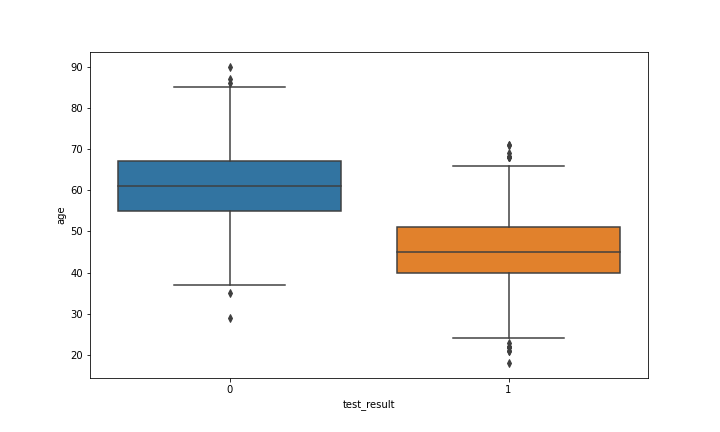

In [13]:
sns.boxplot(x = "test_result", y = "age", data = df);

<IPython.core.display.Javascript object>


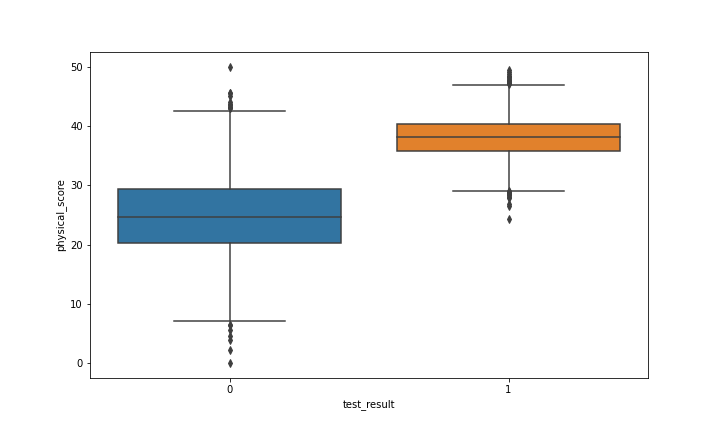

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

In [14]:
sns.boxplot(x='test_result', y='physical_score',data=df)

<IPython.core.display.Javascript object>


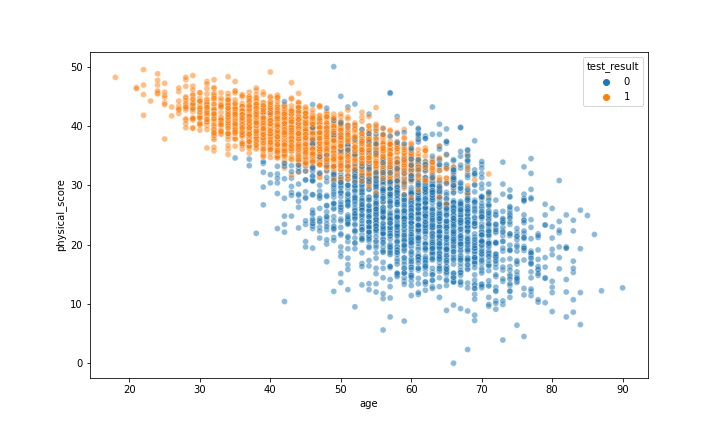

In [15]:
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.5);

In [19]:
df.corr()["test_result"].drop("test_result").sort_values()
# target ile diğer futurelerin korelasyon durumları. 

age              -0.683
physical_score    0.793
Name: test_result, dtype: float64

In [21]:
df["physical_score"].corr(df["age"])
# fiziksel skor ve yaş arasında ki korelasyon durumu.

-0.7821463930089627

### Train Test Split : 

In [24]:
X = df.drop("test_result", axis=1)
y = df["test_result"]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101)

### Scale : 

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

### Default Value Model : 

In [29]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression() # ridge ve lasso default olarak vardır. l2 ridge dir. c değeri alpha değeri tam tersidir.
# class balanced fonksiyonu vardır.
model.fit(X_train_scaler, y_train)
y_pred = model.predict(X_test_scaler)

### Error Metricler : 

In [32]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [33]:
accuracy_score(y_test, y_pred)
# tüm değerlerin tahmin başarısı %91

0.917

In [34]:
precision_score(y_test, y_pred)
# TP / (TP + FP) ile hesaplanır. tahmin ettiğimiz 1 lerin doğru tahmin etme başarımız.

0.9126365054602185

In [36]:
recall_score(y_test, y_pred)
# TP / (TP + FN) elimizde ki 1 değerlerinin doğru tahmin etme başarımız.

0.9558823529411765

In [37]:
precision_score(y_test, y_pred, pos_label = 0)
# tahmin ettiğimiz 0 ların doğru olma olasılığı

0.924791086350975

In [38]:
recall_score(y_test, y_pred, pos_label = 0)
# elimizde ki 0 değerlerin doğru tahmin etme başarımız.

0.8556701030927835

In [42]:
f1_score(y_test, y_pred, pos_label=1)
# 1 için recall ve precision skorları harmonik ortalaması.

0.933758978451716

In [43]:
f1_score(y_test, y_pred, pos_label=0)
# 0 için recall ve precision skorları harmonik ortalaması.

0.888888888888889

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [41]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[332  56]
 [ 27 585]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       388
           1       0.91      0.96      0.93       612

    accuracy                           0.92      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.92      0.92      0.92      1000



<IPython.core.display.Javascript object>


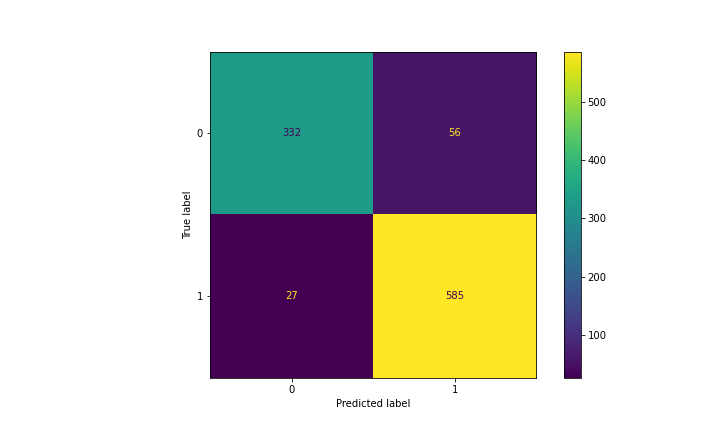

In [46]:
plot_confusion_matrix(model, X_test_scaler, y_test);
# 332 + 27 = 359 tane 0 değerimiz var. 332 tanesi doğru, 27 tanesi yanlış => 0 ları 1 bilme sayımız.
# 585 + 56 = 641 tane 1 değerimiz var. 585 tanesi doğru, 56 tanesi yanlış => 1 leri 0 bilme sayımız.

### Cross Validate ile kontrol : 

In [49]:
from sklearn.model_selection import cross_validate

In [51]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaler, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.915
test_precision   0.914
test_recall      0.947
test_f1          0.930
dtype: float64

### Roc Curve ve AUC : 

In [60]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve

In [64]:
y_pred_proba = model.predict_proba(X_test_scaler)

In [65]:
roc_auc_score(y_test, y_pred_proba[:,1])
# olasılık değerlerimiz ile başarımız %96. yani %96 başarı ile doğru olasılık tahminlerinde bulunduk.

0.9625151607034568

<IPython.core.display.Javascript object>


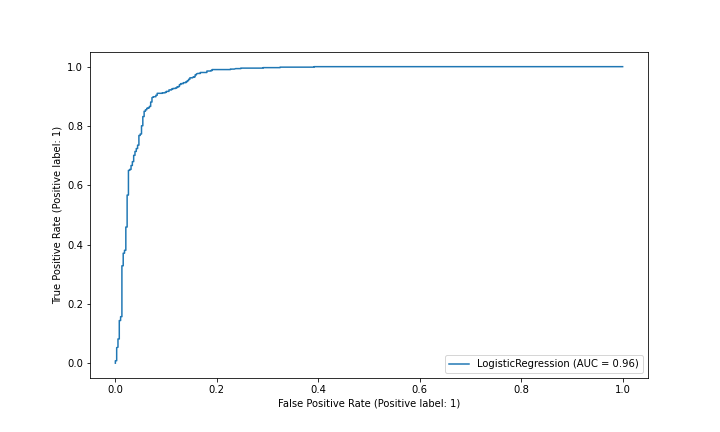

In [67]:
plot_roc_curve(model, X_test_scaler, y_test);
# en iyi threshold değerimiz 0.8 gibi duruyor.

# TP_rate = Recall_score

# FP_rate = 1 - Specifity => 1 den 0 ları doğru bilme oranımız çıkarılır. 

<IPython.core.display.Javascript object>


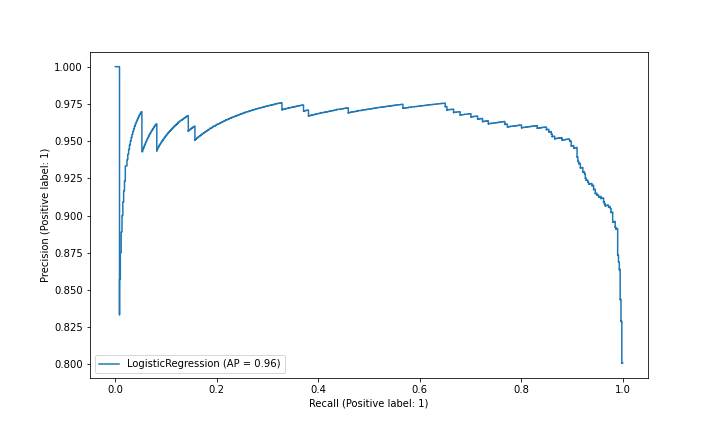

In [68]:
plot_precision_recall_curve(model, X_test_scaler, y_test);